In [22]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from itertools import product
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from tensorflow.keras.callbacks import TensorBoard
import datetime
log_dir = os.path.join('logs', 'fit', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(log_dir)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

PATH = os.path.join('data')
actions = np.array(os.listdir(PATH))

# Define the number of sequences and frames
# sequences = 30
# frames = 30


label_map = {label:num for num, label in enumerate(actions)}

landmarks, labels = [], []

for action in actions:
    action_path = os.path.join(PATH, action)
    
    sequences = os.listdir(action_path)
    
    for sequence in sequences:
        temp = []
        sequence_path = os.path.join(action_path, sequence)
        
        frames = sorted(os.listdir(sequence_path)) 
        
        for frame in frames:
            npy_path = os.path.join(sequence_path, frame)
            if os.path.isfile(npy_path):
                npy = np.load(npy_path)
                temp.append(npy)
        
        if temp:
            landmarks.append(temp)
            labels.append(label_map[action])

X, Y = np.array(landmarks), to_categorical(labels).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=34, stratify=Y)

model = Sequential()
model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(32, return_sequences=False, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, Y_train, epochs=200, callbacks=[tensorboard_callback], validation_data=(X_test, Y_test))

model.save('my_model_4_3.keras')


predictions = np.argmax(model.predict(X_test), axis=1)

test_labels = np.argmax(Y_test, axis=1)

accuracy = metrics.accuracy_score(test_labels, predictions)


logs\fit\20240428-193147
Epoch 1/200


c:\Users\48732\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - categorical_accuracy: 0.0381 - loss: 3.5806 - val_categorical_accuracy: 0.0619 - val_loss: 3.4216
Epoch 2/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - categorical_accuracy: 0.0542 - loss: 3.4291 - val_categorical_accuracy: 0.0819 - val_loss: 3.2474
Epoch 3/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - categorical_accuracy: 0.0861 - loss: 3.1741 - val_categorical_accuracy: 0.1239 - val_loss: 2.9950
Epoch 4/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - categorical_accuracy: 0.1374 - loss: 2.8527 - val_categorical_accuracy: 0.1659 - val_loss: 2.7342
Epoch 5/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - categorical_accuracy: 0.1766 - loss: 2.6643 - val_categorical_accuracy: 0.2765 - val_loss: 2.4757
Epoch 6/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - categorical_accuracy: 0.2745 - loss: 2.3186 - val_categorical_accuracy: 0.3628 - val_loss: 2.0444
Epoch 7/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - categorical_accuracy: 0.3432 - loss: 2.0634 -

In [23]:
print(X_test[1].shape)

(30, 126)


In [26]:
accuracy

0.922566371681416

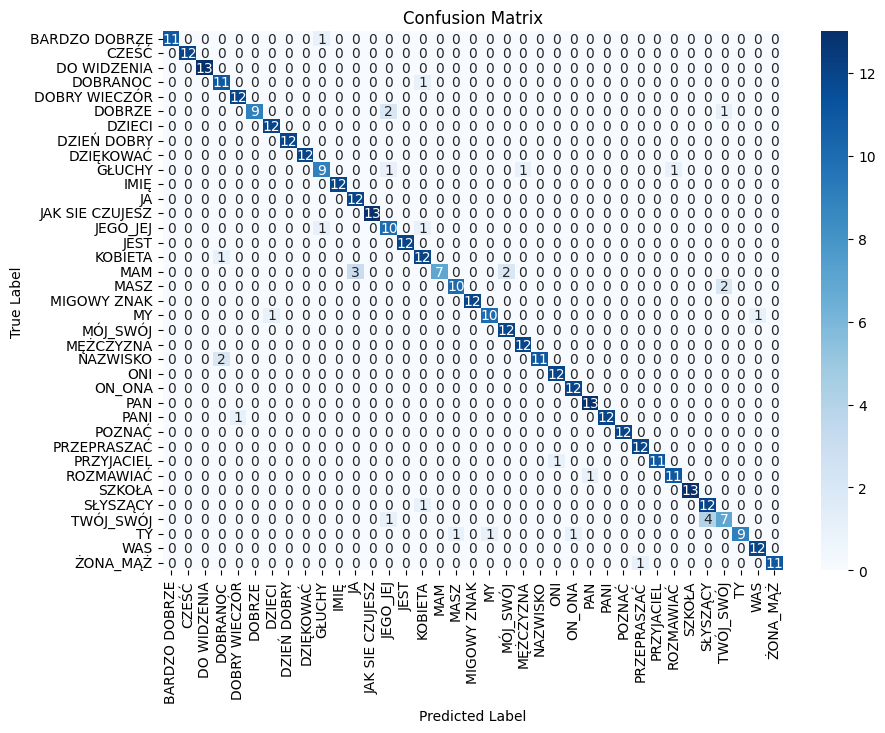

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_labels, predictions)

labels = actions

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [11]:
import json

with open('labels_my_model_4.json', 'w') as f:
    json.dump(label_map, f)
